In [7]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/elish/Downloads/CODING PROJECT/ticket_sales_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,TransactionID,DateTime,EventType,TicketPrice,QuantitySold,CustomerID,CustomerAge,CustomerGender,CustomerLocation
0,1ca5134e-e036-457b-9dc1-23cc21e457f7,2024-10-30 09:44:45,Theater,164.59,9,7b57cee4-27f2-416b-b1ad-71d3f0ab2c86,36,Female,Houston
1,8cd961d5-d928-4f00-ac86-da3b74b71b14,2024-02-01 02:21:50,Concert,171.03,7,3d194df2-81b4-42af-a443-e958012ea5ba,54,Male,Houston
2,402c3eeb-25e7-4fb2-a043-111a3b6ce394,2024-02-06 18:16:34,Concert,20.42,3,ca2e12fd-0ba0-4b4f-a94a-f8489513ae0d,40,Male,Chicago
3,6b32434c-6d8c-48d2-9538-ded401355728,2024-03-04 09:48:31,Concert,61.91,6,4ebfcaad-a411-461b-aa33-545ec70b2f4e,67,Male,Houston
4,583df6a5-0e61-4a35-befb-f5c4c9b8800c,2024-08-25 12:05:19,Concert,63.83,9,eb898cf3-e164-47fd-b3d8-2cf46e04b5ec,24,Male,Los Angeles


In [8]:
df.describe()

,TicketPrice,QuantitySold,CustomerAge
count,1000.000000,1000.000000,1000.000000
mean,108.716970,5.392000,43.589000
std,51.960538,2.843664,15.518276
min,20.420000,1.000000,18.000000
25%,63.240000,3.000000,30.000000
50%,107.170000,5.000000,43.000000
75%,153.840000,8.000000,57.000000
max,199.860000,10.000000,70.000000


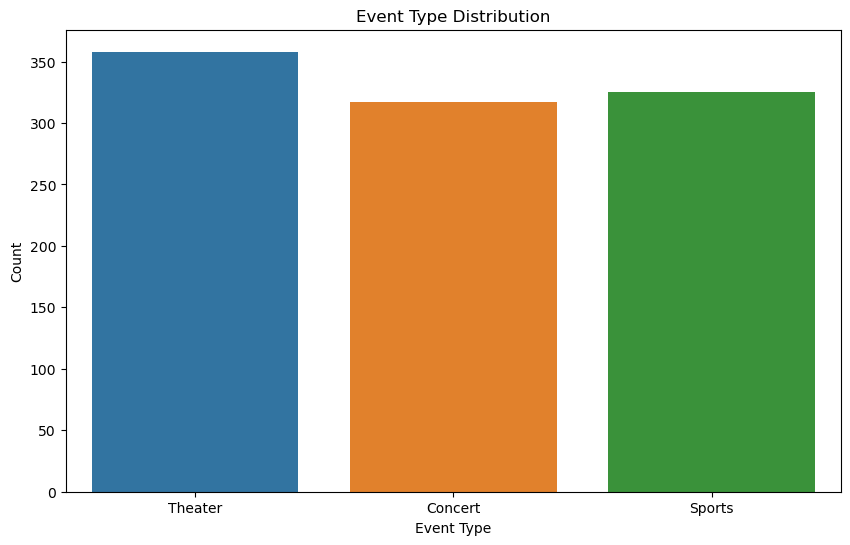

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Event type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EventType')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()


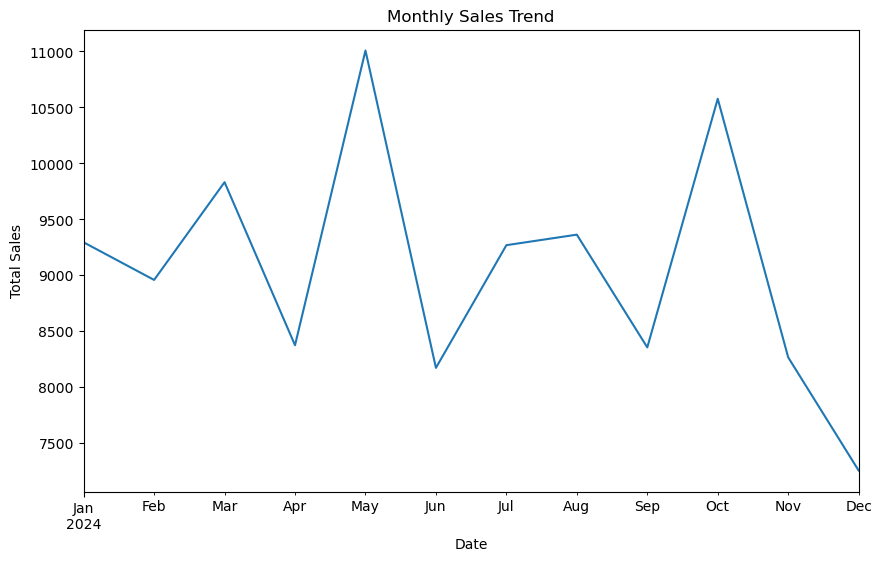

In [10]:
# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sales over time
df.set_index('DateTime', inplace=True)
monthly_sales = df.resample('M').sum()['TicketPrice']

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


C:\Users\elish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


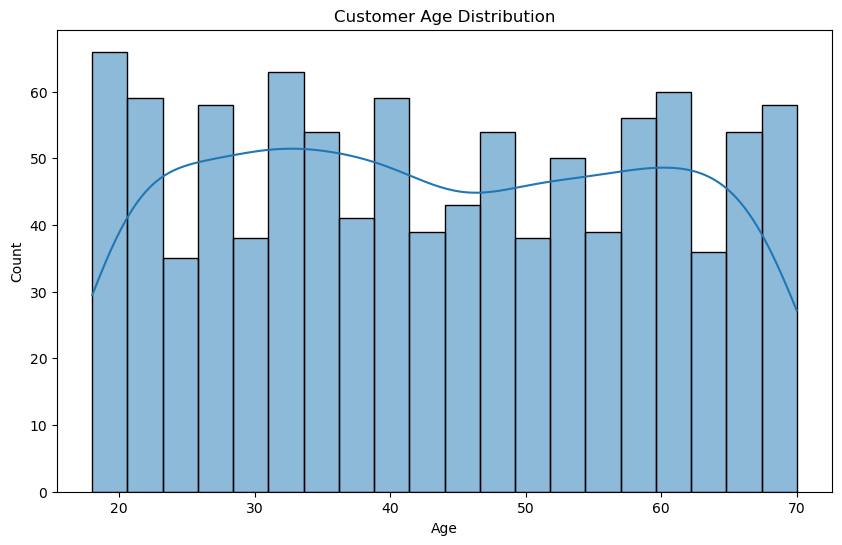

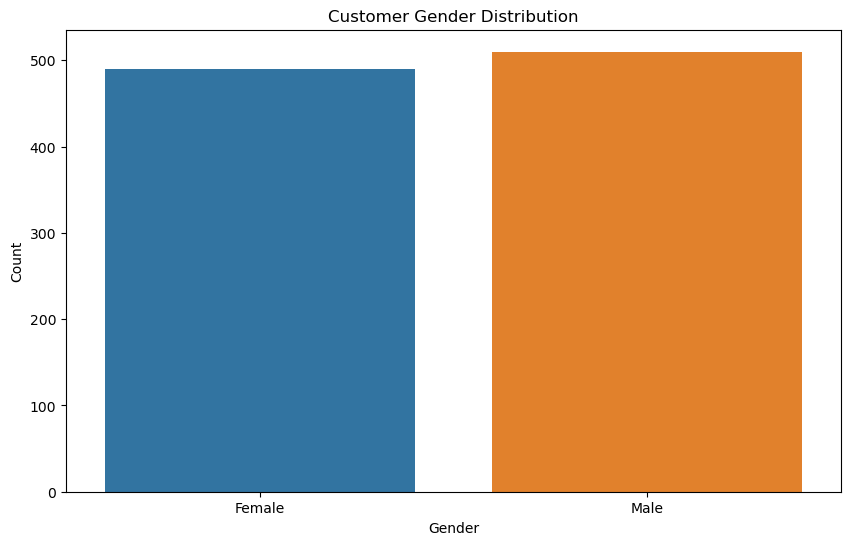

In [11]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CustomerGender')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


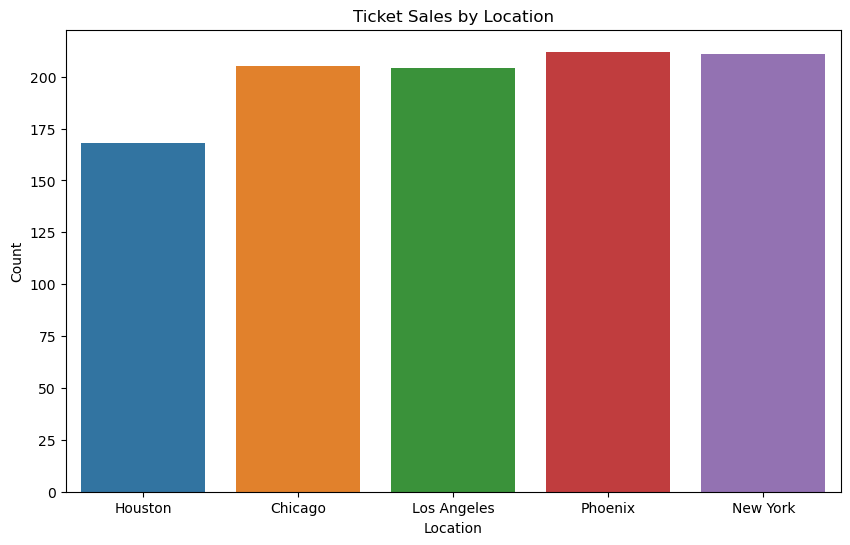

In [12]:
# Sales by location
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CustomerLocation')
plt.title('Ticket Sales by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


In [13]:
# Sales analysis by event type
sales_by_event = df.groupby('EventType').agg({'TicketPrice': ['sum', 'mean'], 'QuantitySold': 'sum'})
sales_by_event.columns = ['TotalRevenue', 'AverageTicketPrice', 'TotalQuantitySold']
sales_by_event.reset_index(inplace=True)
sales_by_event


,EventType,TotalRevenue,AverageTicketPrice,TotalQuantitySold
0,Concert,34448.61,108.670694,1677
1,Sports,36395.87,111.987292,1729
2,Theater,37872.49,105.789078,1986


In [14]:
# Age group segmentation
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)

# Age group distribution
age_group_distribution = df['AgeGroup'].value_counts().sort_index()
age_group_distribution


AgeGroup
0-20      41
21-30    193
31-40    205
41-50    170
51-60    183
61-70    186
71+       22
Name: count, dtype: int64

In [15]:
# Gender distribution
gender_distribution = df['CustomerGender'].value_counts()
gender_distribution


CustomerGender
Male      510
Female    490
Name: count, dtype: int64

In [16]:
# Ticket sales by location
location_sales = df['CustomerLocation'].value_counts()
location_sales


CustomerLocation
Phoenix        212
New York       211
Chicago        205
Los Angeles    204
Houston        168
Name: count, dtype: int64

In [17]:
# Peak sales periods
peak_sales_periods = df.resample('M')['TicketPrice'].sum().sort_values(ascending=False).head(3)
peak_sales_periods


DateTime
2024-05-31    11008.18
2024-10-31    10576.71
2024-03-31     9831.34
Name: TicketPrice, dtype: float64

In [19]:
# Correlation analysis
correlation_matrix = df[['TicketPrice', 'QuantitySold', 'CustomerAge']].corr()
print(correlation_matrix)


              TicketPrice  QuantitySold  CustomerAge
TicketPrice      1.000000      0.011079    -0.039350
QuantitySold     0.011079      1.000000    -0.037766
CustomerAge     -0.039350     -0.037766     1.000000


In [20]:
# Average ticket price by event type and location
avg_price_event_location = df.groupby(['EventType', 'CustomerLocation'])['TicketPrice'].mean().unstack()
print(avg_price_event_location)


CustomerLocation     Chicago     Houston  Los Angeles    New York     Phoenix
EventType                                                                    
Concert           100.488636  116.832727   112.211970  106.810476  108.291194
Sports            104.466230  117.561887   113.920286  108.621159  115.602361
Theater            98.238846  110.281333   104.905147  111.158481  105.176849


In [21]:
# Customer demographics for each event type
age_gender_event = df.groupby(['EventType', 'CustomerGender', 'AgeGroup']).size().unstack().fillna(0)
print(age_gender_event)


AgeGroup                  0-20  21-30  31-40  41-50  51-60  61-70  71+
EventType CustomerGender                                              
Concert   Female             6     38     23     25     28     28    3
          Male               5     39     36     24     31     30    1
Sports    Female             3     26     37     34     23     40    2
          Male               8     27     36     26     36     24    3
Theater   Female             9     31     38     26     37     25    8
          Male              10     32     35     35     28     39    5


C:\Users\elish\AppData\Local\Temp\ipykernel_14780\1955692787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_event = df.groupby(['EventType', 'CustomerGender', 'AgeGroup']).size().unstack().fillna(0)


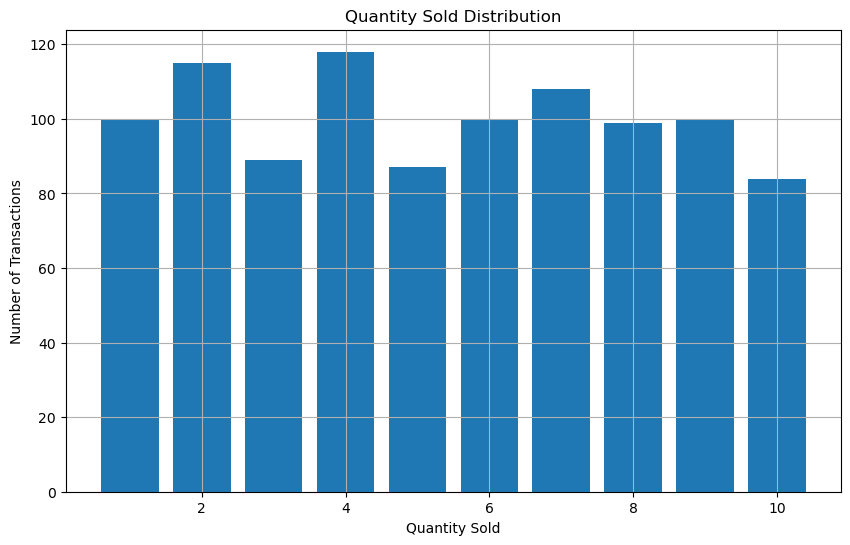

In [22]:
# Quantity sold distribution
quantity_distribution = df['QuantitySold'].value_counts().sort_index()

# Plot quantity sold distribution
plt.figure(figsize=(10, 6))
plt.bar(quantity_distribution.index, quantity_distribution.values)
plt.title('Quantity Sold Distribution')
plt.xlabel('Quantity Sold')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


In [23]:
# Customer loyalty analysis
repeat_customers = df['CustomerID'].value_counts()

# Number of customers with more than one purchase
loyal_customers = repeat_customers[repeat_customers > 1]
print(f"Number of loyal customers: {len(loyal_customers)}")

# Percentage of loyal customers
loyal_customer_percentage = (len(loyal_customers) / df['CustomerID'].nunique()) * 100
print(f"Percentage of loyal customers: {loyal_customer_percentage:.2f}%")


Number of loyal customers: 0
Percentage of loyal customers: 0.00%


C:\Users\elish\AppData\Local\Temp\ipykernel_14780\4153592093.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_age_preference = df.groupby(['AgeGroup', 'EventType']).size().unstack().fillna(0)


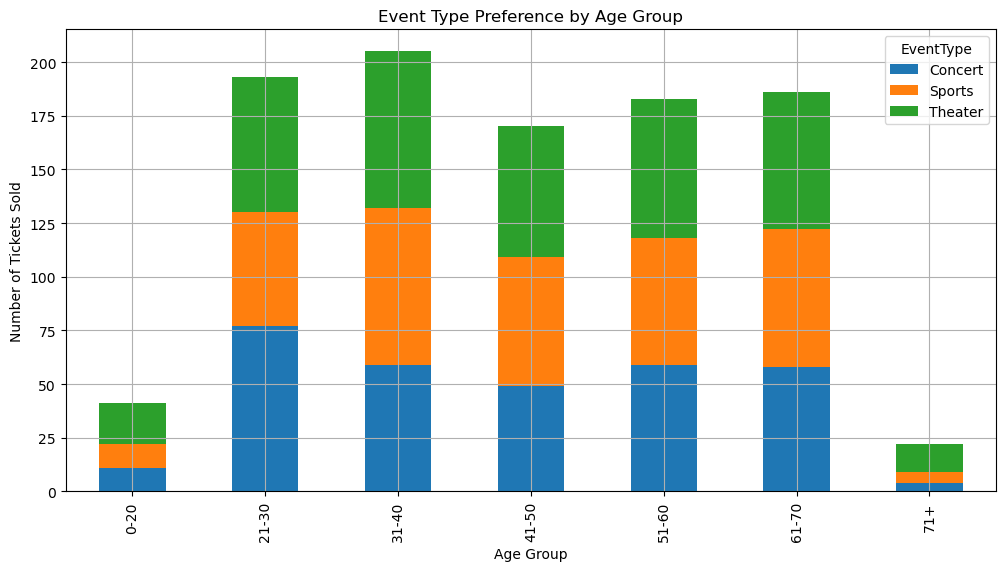

In [24]:
# Event type preference by age group
event_age_preference = df.groupby(['AgeGroup', 'EventType']).size().unstack().fillna(0)

# Plot event type preference by age group
event_age_preference.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Event Type Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Sold')
plt.grid(True)
plt.show()
